## Exercise 1

/home/edyta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edyta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edyta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

AttributeError: 'NoneType' object has no attribute 'show'

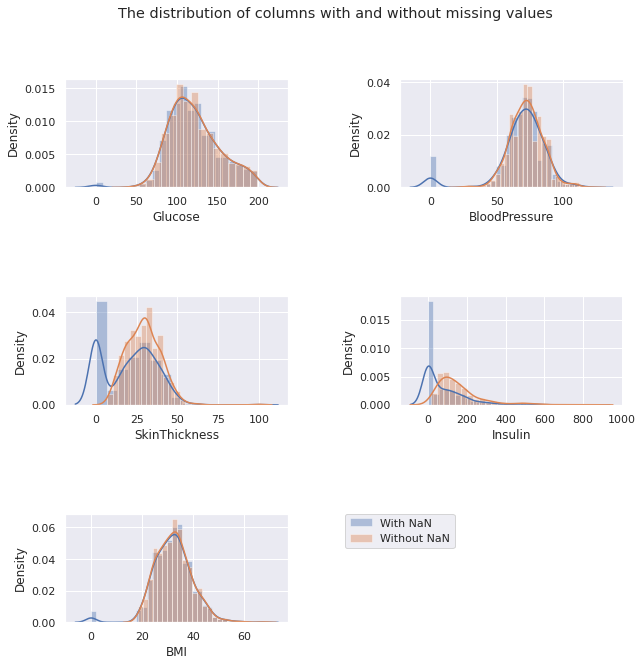

In [9]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



data = pd.read_csv('diabetes.csv')
list_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
#a)
list_counts = []
for elem in list_columns:
    count = (data[elem] == 0).sum()
    list_counts.append(count)

df = pd.DataFrame(list_counts)
df['index name'] = list_columns
df = pd.DataFrame(df.set_index('index name'))

#b)
data = data[list_columns]
data_nan = data.replace(0, np.NaN)

#c)
from matplotlib import pyplot as plt
import seaborn as sns, numpy as np
sns.set()


def plots(data, data2):
    count=1
    plt.subplots(figsize=(10, 10))
    plt.suptitle('The distribution of columns with and without missing values')
    plt.subplots_adjust(hspace=1, wspace = 0.5)



    for elem in data:
        plt.subplot(3,2,count)
        sns.distplot(data[elem], label='With NaN')
        sns.distplot(data2[elem], label = 'Without NaN')
        count+=1
    plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.05))

    
a = plots(data, data_nan)
a.show()

#Explain why it is important to use Nan instead of zero for missing values indication.

By defininf NaNs values we will be sure that they will not be considerd  as normal value, but as NaN and they will not have 
infuence on our analysis. 


In [4]:
#d
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer

data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)
Y = data['Outcome']
# Split data


knn = KNeighborsClassifier()

imputers = ["mean", "median", "most_frequent"]

def simpleImp(a): 
    imp = SimpleImputer(missing_values=np.NaN, strategy=a)
    imp.fit(X_train)

    X_train_imp = imp.transform(X_train)
    X_val_imp = imp.transform(X_valid)

    knn.fit(X_train_imp, y_train)
    y_val = knn.predict(X_val_imp)
    print(a , accuracy_score(y_valid, y_val))

    


for imput in imputers:
    X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
    test_size = 0.5
    X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5, random_state=20)
    simpleImp(imput)

# I run this code several times. The mean SimpleImputer strategy had the best (highest) accurancy score. Thus following:
simpleImp("mean")

mean 0.7272727272727273
median 0.7272727272727273
most_frequent 0.7402597402597403
mean 0.7402597402597403


## Exercise 2

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Master'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Mr'),
 Text(3, 0, 'Mrs'),
 Text(4, 0, 'Others')]

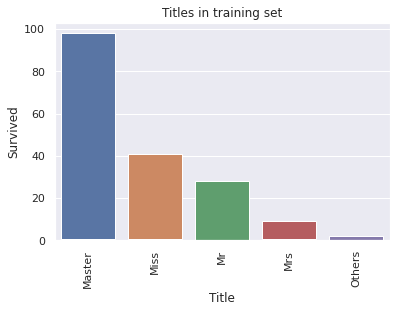

In [14]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('titanic.csv')
data["Title"] = data['Name'].str.extract(r'([A-Za-z]+)\.')

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.2)
X = data.drop('Survived', axis=1)
Y = data['Survived']


data["Title"].unique()
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')

#Fix typos
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].replace('Mlle', 'Miss')

data[['Title', 'Survived']].groupby('Title').mean()


group = X_train['Sex'].groupby(X_train["Title"]).count()
df = group.reset_index()
df = df.sort_values(by=['Sex'], ascending=False)
ax = sns.barplot( df.Title, df.Sex)
ax.set_title('Titles in training set')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Titles in training set')


df2 = data[['Title', 'Survived']].groupby('Title').mean()
df2 = df2.reset_index()
ax2 = sns.barplot( df2.Title, df2.Survived)
ax2.set_title('Titles in training set')
ax2.set_xticklabels(ax.get_xticklabels(),rotation = 90)




In [17]:
X = data.drop('Survived', axis=1)
Y = data['Survived']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
title_encoded = le.fit_transform(data['Title'])
data['encoded_title'] = title_encoded

X_train, X_valid, y_train, y_valid = train_test_split(data['Fare'], data['Survived'], test_size=.2, random_state=20)
knn.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))
print("Fare ", accuracy_score(y_test, knn.predict(X_valid.to_numpy().reshape(-1,1))))

X_train, X_valid, y_train, y_valid = train_test_split(data[['Fare', 'encoded_title']], data['Survived'], test_size=.2, random_state=20)
knn.fit(X_train.to_numpy().reshape(-1,2), y_train.to_numpy().reshape(-1,1))
print("Fare and Title", accuracy_score(y_valid, knn.predict(X_valid.to_numpy().reshape(-1,2))))

Fare  0.6368715083798883
Fare and Title 0.7374301675977654


/home/edyta/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/edyta/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
